Notebook to compare mean outgoing longwave radiation at toa from NextGEMS simulations (using Low Resolution Archive) with ERA5 eanalysis data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Hovmoeller_plot import hovmoller_plot
from aqua import Reader, catalogue
#catalogue();

Text(0.5, 1.0, 'global mean precipitation rate')

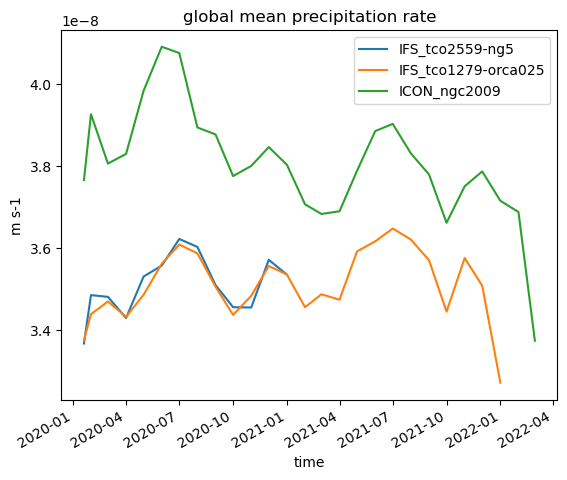

In [3]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon"

data = {}
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve(fix=False)["tprate"]

plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        reader.fldmean(data[(model, exp)]).plot(label=f"{model}_{exp}")
plt.legend()
plt.ylabel("m s-1")
plt.title("global mean precipitation rate")

Now produce Hovmöller plot of tropical precipitation

tprate [m s**-1]
tprate [m s**-1]
tprate [m s**-1]


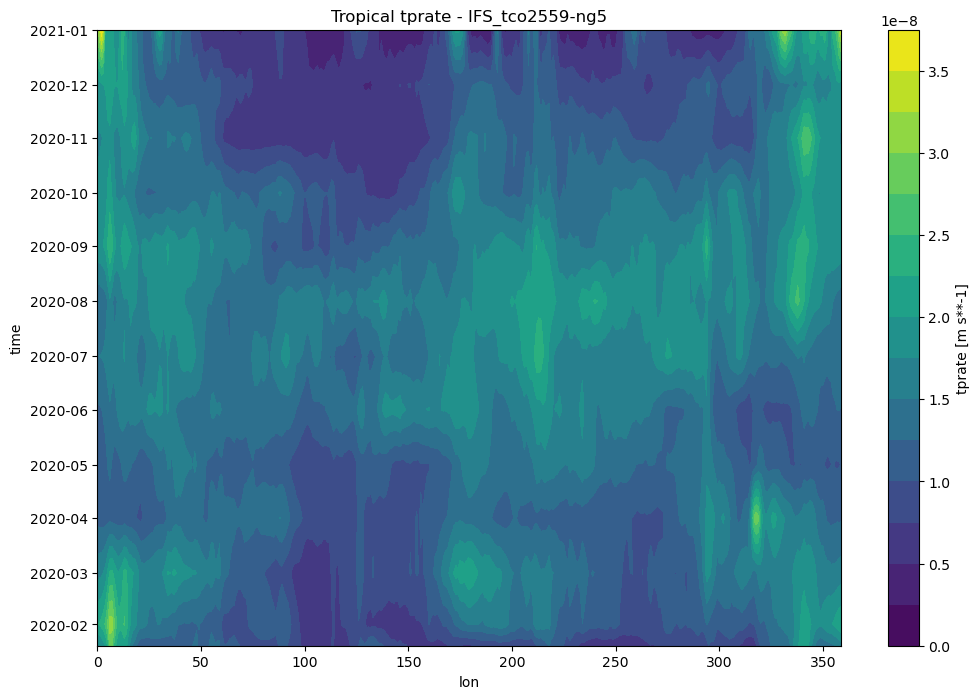

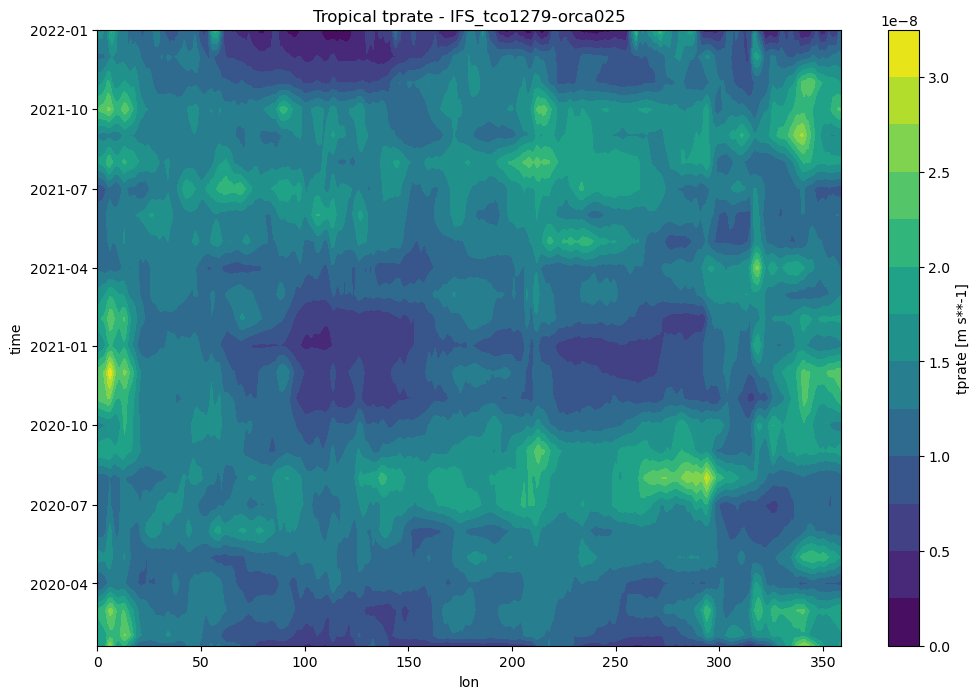

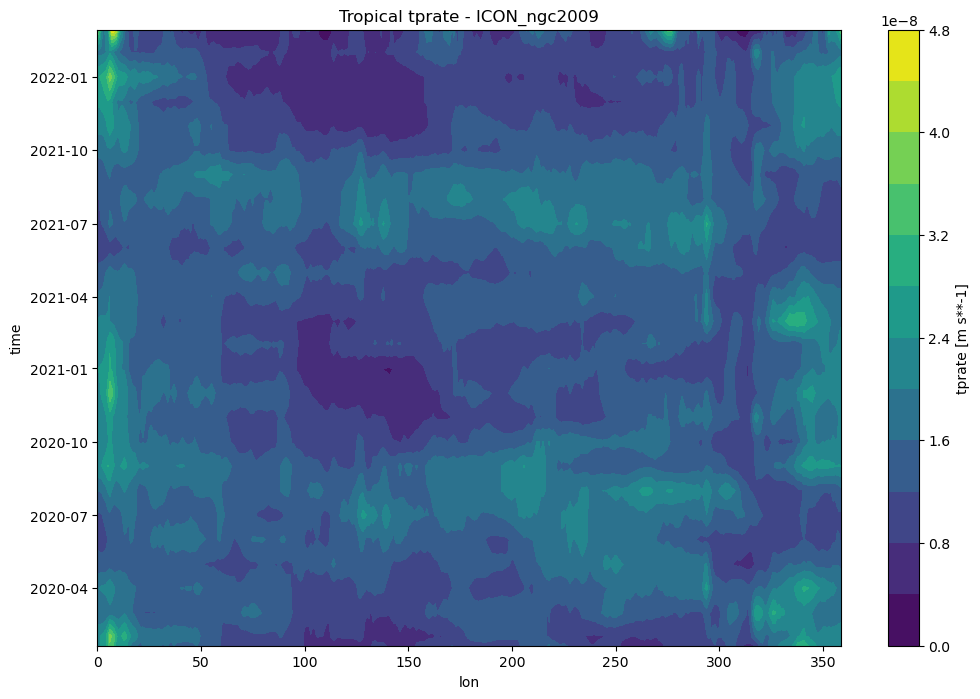

In [4]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon"

data = {}
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve(fix=False)["tprate"]
        infile = data[(model, exp)].isel(lat=range(-30,30))
        hovmoller_plot(infile,dim='lat',invert_axis=True,contour=True,title=f"Tropical tprate - {model}_{exp}",levels=13)